In [1]:
import numpy as np

In [2]:
import scipy.stats as ss

In [3]:
import matplotlib.pyplot as plt

In [4]:
n = 100
beta_0 = 5
beta_1 = 2

In [5]:
np.random.seed(1)

In [6]:
x = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x + ss.norm.rvs(loc=0,scale=1,size=n)

In [7]:
print(np.mean(x))
print(np.mean(y))

4.8587792760014565
14.80142786070299


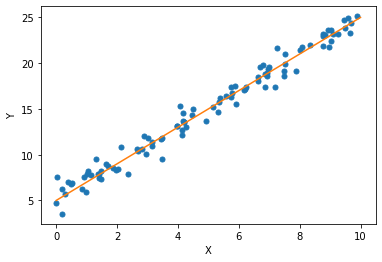

In [8]:
plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("X")
plt.ylabel("Y");

In [9]:
rss = []
slopes = np.arange(-10,15,0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope * x)**2))

In [10]:
rss

[465163.6265980302,
 464389.08137639664,
 463615.18165403913,
 462841.9274309581,
 462069.3187071535,
 461297.35548262496,
 460526.03775737283,
 459755.36553139694,
 458985.33880469744,
 458215.9575772741,
 457447.22184912727,
 456679.1316202565,
 455911.68689066224,
 455144.8876603442,
 454378.73392930237,
 453613.22569753695,
 452848.36296504777,
 452084.145731835,
 451320.5739978984,
 450557.64776323806,
 449795.36702785414,
 449033.7317917465,
 448272.7420549152,
 447512.39781736,
 446752.69907908136,
 445993.6458400789,
 445235.23810035264,
 444477.47585990286,
 443720.35911872925,
 442963.8878768319,
 442208.062134211,
 441452.8818908663,
 440698.347146798,
 439944.45790200593,
 439191.21415649017,
 438438.6159102507,
 437686.66316328745,
 436935.3559156006,
 436184.6941671901,
 435434.67791805574,
 434685.3071681979,
 433936.5819176162,
 433188.50216631085,
 432441.0679142817,
 431694.2791615289,
 430948.1359080525,
 430202.6381538523,
 429457.7858989284,
 428713.5791432808,
 42

In [11]:
ind_min = np.argmin(rss)
ind_min

1200

In [12]:
print(f"Estimate for the slope: {slopes[ind_min]}")

Estimate for the slope: 1.9999999999997442


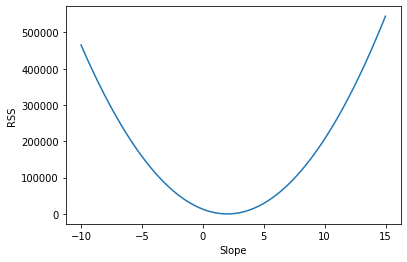

In [13]:
plt.figure()
plt.plot(slopes, rss)
plt.xlabel("Slope")
plt.ylabel("RSS");

In [14]:
import statsmodels.api as sm
mod = sm.OLS(y, x)
est = mod.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Fri, 15 May 2020   Prob (F-statistic):                    1.14e-75
Time:                        23:59:06   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.7569      0.051     54.538      0.000       2.657       2.857
==============================================================================
Omnibus:                        7.901   Durbin-Watson:                   1.579
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.386
Skew:                           0.139   Prob(JB):                        0.184
Kurtosis:                       2.143   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
X = sm.add_constant(x)
mod = sm.OLS(y, X)
est = mod.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Fri, 15 May 2020   Prob (F-statistic):           7.47e-82
Time:                        23:59:06   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.000       4.891       5.583
x1             1.9685      0.031     64.151      0.000       1.908       2.029
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   2.206
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.753
Skew:                          -0.189   Prob(JB):                        0.416
Kurtosis:                       3.528   Cond. No.                         11.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
n = 500
beta_0 = 5
beta_1 = 2
beta_2 = -1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size=n)
x_2 = 10 * ss.uniform.rvs(size=n)
y = beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc=0,scale=1,size=n)

In [17]:
X = np.stack([x_1, x_2], axis=1)

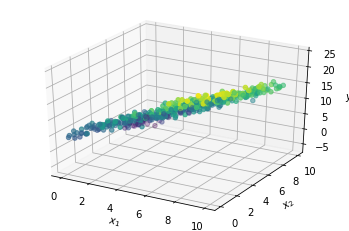

In [18]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$");

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.intercept_

5.15407776377725

In [21]:
lm.coef_

array([ 1.9999379 , -1.02026449])

In [22]:
X_0 = np.array([2, 4])

In [23]:
lm.predict(X_0)

ValueError: Expected 2D array, got 1D array instead:
array=[2 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
lm.predict(X_0.reshape(1, -1))

array([5.07289561])

In [25]:
lm.score(X, y)

0.9798997316600129

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=1)

In [27]:
lm = LinearRegression(fit_intercept=True)

In [28]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lm.score(X_test, y_test)

0.9794930834681773